# Customer Conversion Prediction Analysis- Tried OneHotEncoding for Job column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_excel("Customer Conversion Prediction.xlsx")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no


In [3]:
df.shape

(45211, 11)

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(45205, 11)

In [47]:
df.rename(columns={"y":"target"},inplace=True)

([<matplotlib.patches.Wedge at 0x7f3d0682edc0>,
 [Text(-0.3952810366448843, -1.0265246719241314, 'no'),
  Text(0.3952810606724291, 1.0265246626719104, 'yes')],
 [Text(-0.21560783816993687, -0.5599225483222535, '88.30%'),
  Text(0.21560785127587037, 0.5599225432755874, '11.70%')])

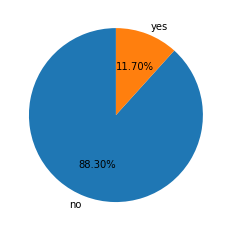

In [9]:
plt.pie(df["target"].value_counts(),autopct='%1.2f%%',startangle=90,labels=["no","yes"])

In [48]:
df["target"]=df["target"].map({"no":0,"yes":1})

In [11]:
job_order = df.groupby('job')['target'].mean().reset_index().sort_values('target')['job']
marital_order = df.groupby('marital')['target'].mean().reset_index().sort_values('target')['marital']
qual_order = df.groupby('education_qual')['target'].mean().reset_index().sort_values('target')['education_qual']
call_order = df.groupby('call_type')['target'].mean().reset_index().sort_values('target')['call_type']
prev_order = df.groupby('prev_outcome')['target'].mean().reset_index().sort_values('target')['prev_outcome']
mon_order = df.groupby('mon')['target'].mean().reset_index().sort_values('target')['mon']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


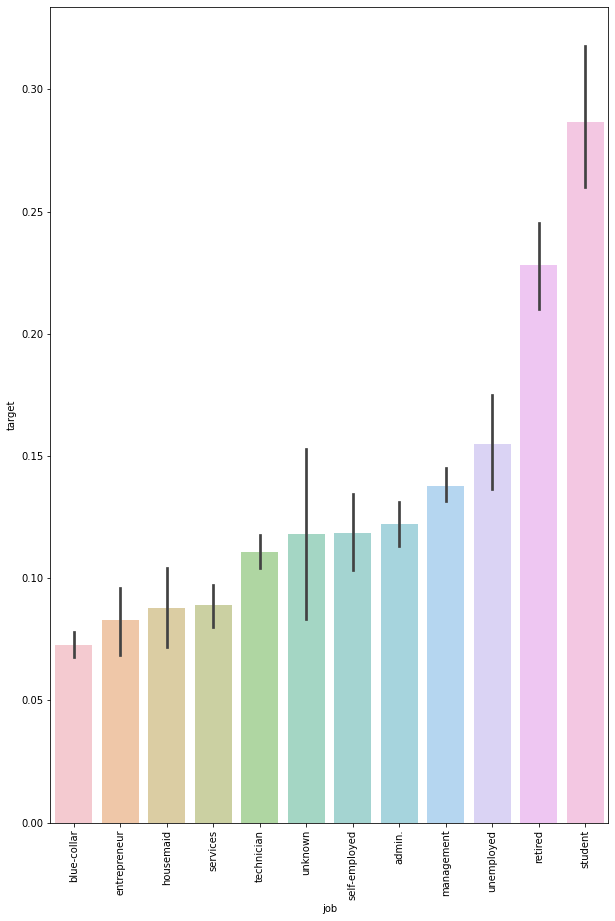

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


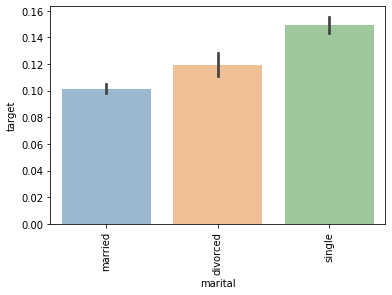

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


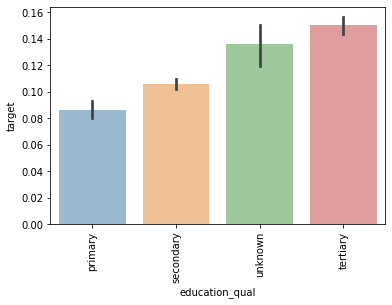

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


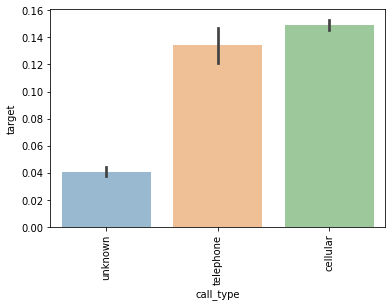

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


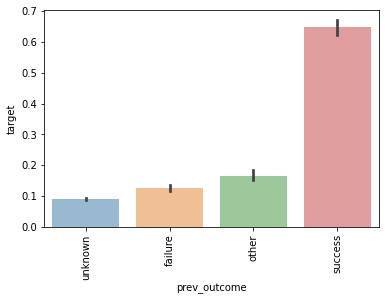

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


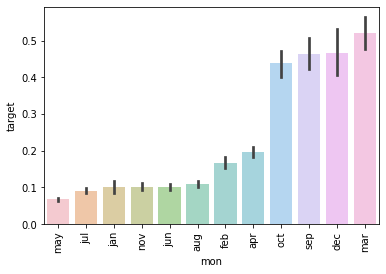

In [12]:
plt.figure(figsize=(10,15))


sns.barplot(df["job"],df["target"],alpha=0.50,order=job_order)
plt.xticks(rotation=90)
plt.show()


sns.barplot(df["marital"],df["target"],alpha=0.50,order=marital_order)
plt.xticks(rotation=90)
plt.show()


sns.barplot(df["education_qual"],df["target"],alpha=0.50,order=qual_order)
plt.xticks(rotation=90)
plt.show()


sns.barplot(df["call_type"],df["target"],alpha=0.50,order=call_order)
plt.xticks(rotation=90)
plt.show()

sns.barplot(df["prev_outcome"],df["target"],alpha=0.50,order=prev_order)
plt.xticks(rotation=90)
plt.show()

sns.barplot(df["mon"],df["target"],alpha=0.50,order=mon_order)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

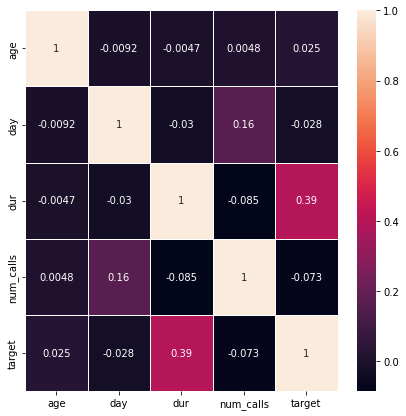

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.8)

In [49]:
del df['day']
del df['num_calls']

In [50]:
df["marital"]=df["marital"].map({"married":0,"divorced":1,"single":2})
df["education_qual"]=df["education_qual"].map({"primary":0,"secondary":1,"unknown":2,"tertiary":3})
df = pd.get_dummies(df, columns = ['call_type','prev_outcome','job','mon'],drop_first=True)

In [41]:
df.head()

,age,marital,education_qual,dur,y,call_type_telephone,call_type_unknown,prev_outcome_other,prev_outcome_success,prev_outcome_unknown,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
0,58.0,0,3,261.0,no,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,44.0,2,1,151.0,no,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,33.0,0,1,76.0,no,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,47.0,0,2,92.0,no,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,33.0,2,2,198.0,no,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [51]:
x=df.drop("target",axis=1)
y=df["target"]

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2022)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [53]:
pipe_lr = Pipeline([('pca',PCA()),
                    ('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=2022))])
pipe_dt = Pipeline([('pca',PCA()),
                    ('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=2022))])
pipe_rf = Pipeline([('pca',PCA()),
                    ('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=2022))])
pipe_knn = Pipeline([('pca',PCA()),
                     ('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('pca',PCA()),
                     ('scl', StandardScaler()),
                     ('SVM', svm.SVC(random_state=2022))])
pipe_xgb = Pipeline([('pca',PCA()),
                     ('scl', StandardScaler()),
                     ('XGB', XGBClassifier(random_state=2022))])

In [54]:
lr_param_grid = [{'LR__penalty': ['l2'],'LR__C':[2.0]}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],'DT__max_depth': [3,4,5,6,7]}]
rf_param_grid = [{'RF__criterion':['gini'],'RF__n_estimators':[10]}]
knn_param_grid = [{'KNN__n_neighbors':[10],'KNN__weights': ['uniform', 'distance'],'KNN__metric': ['euclidean']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C':[6]}]
xgb_param_grid = [{'XGB__learning_rate': [0.3,0.5,0.6,0.8,1.0],'XGB__max_depth':[6]}]
cv=StratifiedKFold(n_splits=3)

In [55]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='roc_auc',
        cv=cv)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='roc_auc',
        cv=cv)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='roc_auc',
        cv=cv)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='roc_auc',
        cv=cv)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='roc_auc',
        cv=cv)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='roc_auc',
        cv=cv)

In [56]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
x_train_,y_train_=sm.fit_resample(x_train,y_train)

In [27]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_))

Counter({0: 31942, 1: 4222})
Counter({1: 29900, 0: 22496})


In [57]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]
for pipe in grids:
    pipe.fit(x_train_,y_train_)

In [58]:
from sklearn.metrics import roc_auc_score, classification_report
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],model.score(x_test,y_test)))
    y_pred=model.predict(x_test)
    print("AUROC:",roc_auc_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

Logistic Regression Test Accuracy: 0.8918837136272626
AUROC: 0.8104785632929141
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      7967
           1       0.40      0.78      0.53      1076

    accuracy                           0.84      9043
   macro avg       0.68      0.81      0.72      9043
weighted avg       0.90      0.84      0.86      9043

Decision Trees Test Accuracy: 0.875924177007106
AUROC: 0.801864557003961
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      7967
           1       0.39      0.76      0.52      1076

    accuracy                           0.83      9043
   macro avg       0.68      0.80      0.71      9043
weighted avg       0.90      0.83      0.85      9043

Random Forest Test Accuracy: 0.8892514568692511
AUROC: 0.8054858493889524
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      7967
          

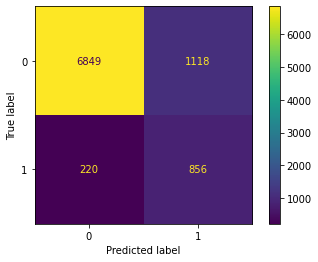

In [59]:
ConfusionMatrixDisplay.from_estimator(xgb_grid_search, x_test, y_test)

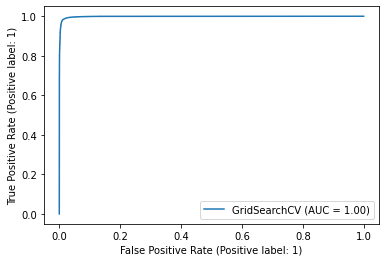

In [68]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(xgb_grid_search,x_train_,y_train_)

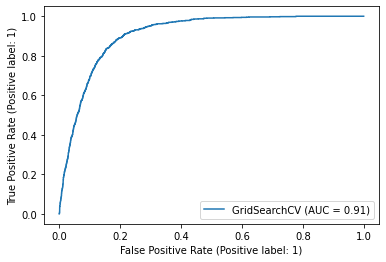

In [62]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(xgb_grid_search,x_test,y_test)

In [69]:
thresholds = list(zip(xgb_grid_search.best_estimator_.named_steps["XGB"].feature_importances_, df.drop("target",axis=1)))
imp = pd.DataFrame(thresholds, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True,ignore_index=True)
imp

,Importance,Feature
0,0.244601,call_type_telephone
1,0.189678,age
2,0.080173,job_unemployed
3,0.071002,prev_outcome_success
4,0.054105,mon_jul
5,0.040389,job_housemaid
6,0.035634,job_unknown
7,0.029830,mon_sep
8,0.026932,call_type_unknown
9,0.021423,job_services


Bit imrpovement than the previous one(Job-Label Encoding).. Same as before XGBClassifier performs better than other classifiers.